In [9]:
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE
mine = MINE(alpha=0.6, c=15)


np.random.seed(42)

def add_noise_with_r2(fx, epsilon):
    """
    Adds noise to fx such that 1 - R^2 = epsilon.
    
    Parameters:
        fx: array-like, clean function output
        epsilon: desired 1 - R^2 (e.g., 0.2 for R^2 = 0.8)
        random_seed: for reproducibility
        
    Returns:
        y_noisy: fx + noise
    """

    # Variance of the clean signal
    var_fx = np.var(fx)

    # Compute noise variance to achieve desired R^2
    var_noise = (epsilon / (1 - epsilon)) * var_fx

    # Generate zero-mean Gaussian noise with that variance
    noise = np.random.normal(0, np.sqrt(var_noise), size=len(fx))

    return fx + noise


def generate_noisy_relationship(start, end, n, y_func, noise_eps=0.1, inverse_xy=False, normalize=False, f_str=None):
    if f_str is None:
        f_str = 'f(x)'
    x = np.linspace(start, end, n)
    y_clean = y_func(x)
    y_noisy = add_noise_with_r2(y_clean, noise_eps)

    # normalize 
    if normalize:
        x = (x - np.min(x)) / (np.max(x) - np.min(x))
        y_clean = (y_clean - np.min(y_clean)) / (np.max(y_clean) - np.min(y_clean))
        y_noisy = (y_noisy - np.min(y_noisy)) / (np.max(y_noisy) - np.min(y_noisy))
        

    # Plot the clean and noisy data
    plt.figure(figsize=(8, 6))
    if inverse_xy:
        x, y_clean = y_clean, x
    plt.plot(x, y_clean, label=f'Clean {f_str}', color='blue')
    if inverse_xy:
        x, y_noisy = y_noisy, y_clean
    plt.scatter(x, y_noisy, label=f'Noisy {f_str}', color='red', s=20, alpha=0.6)
    mine.compute_score(x, y_noisy)
    plt.title(f'MIC = {round(mine.mic(), 2)}', fontsize=20)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()


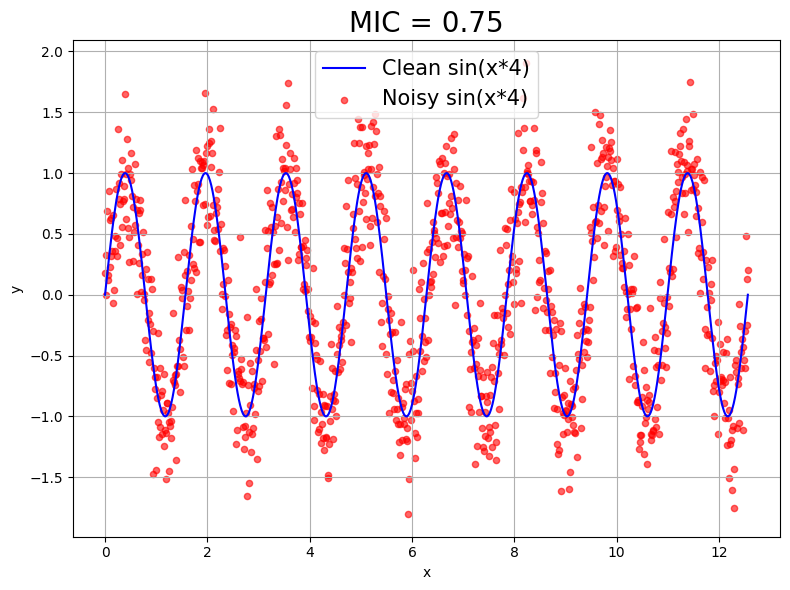

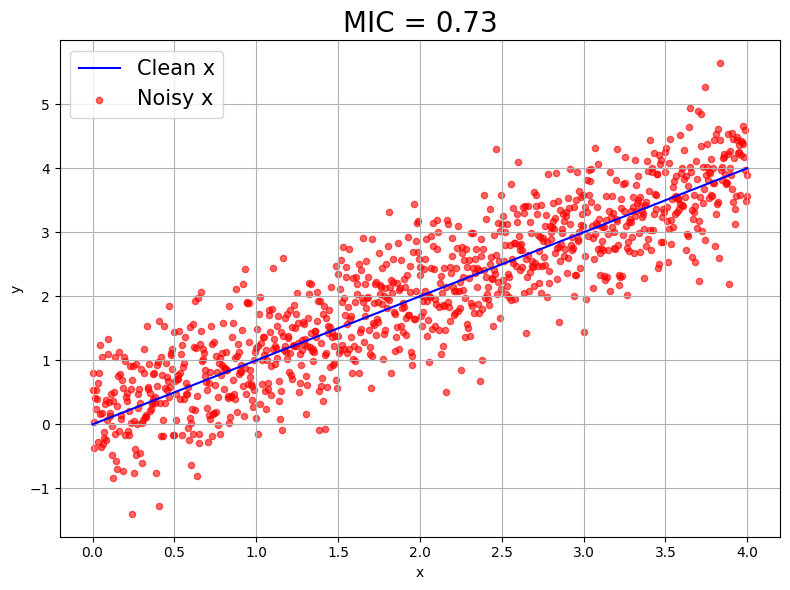

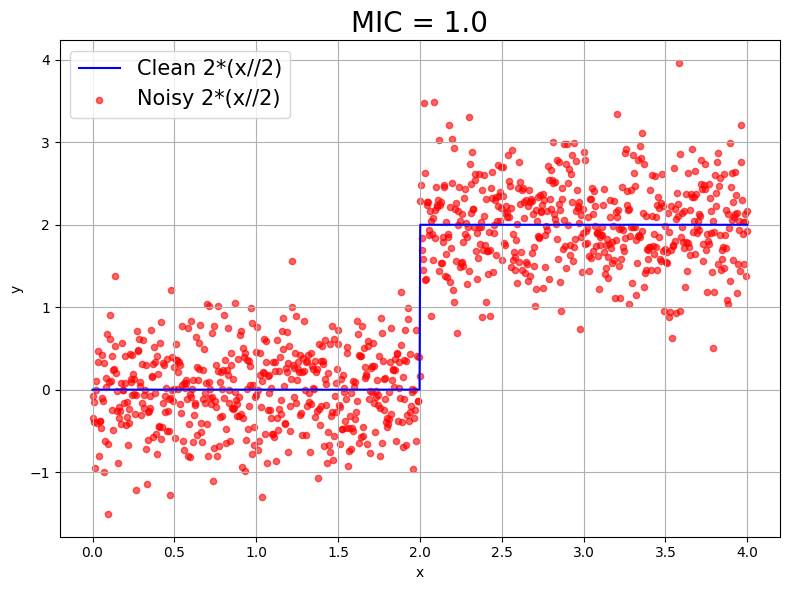

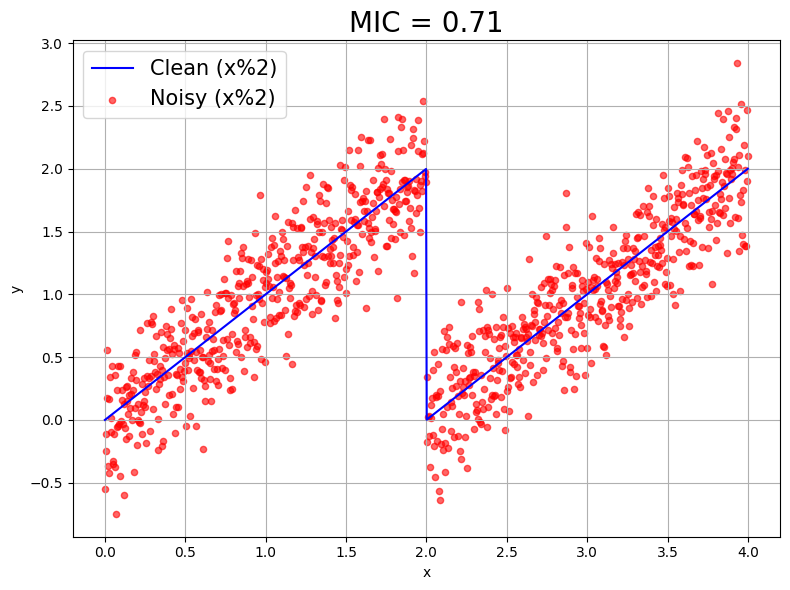

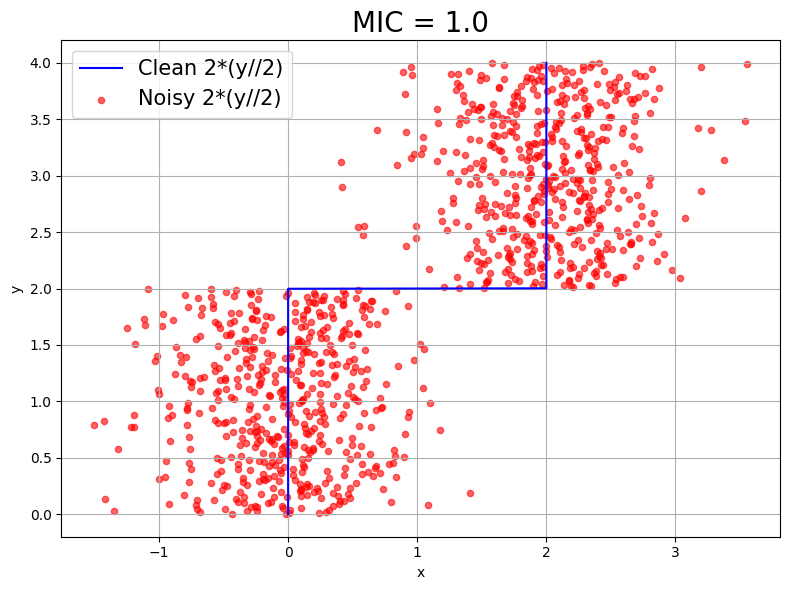

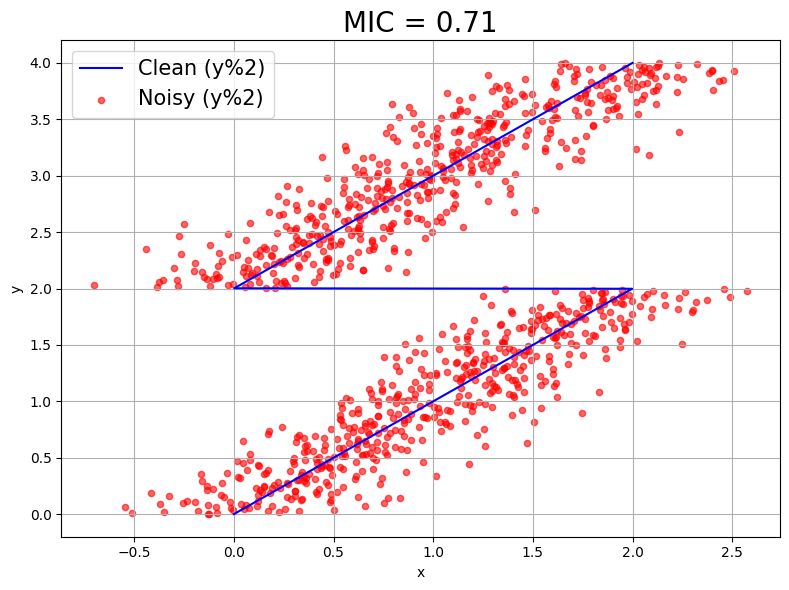

In [10]:
n = 1_000
noise_eps = 0.2
generate_noisy_relationship(0, 4*np.pi, n, lambda x: np.sin(x*4), noise_eps, f_str='sin(x*4)')
# generate_noisy_relationship(0, 4, n, lambda x: x//5, noise_eps, f_str='x//5')
generate_noisy_relationship(0, 4, n, lambda x: x, noise_eps, f_str='x')
generate_noisy_relationship(0, 3.9999, n, lambda x: 2*(x//2), noise_eps, f_str='2*(x//2)')
generate_noisy_relationship(0, 3.9999, n, lambda x: (x%2), noise_eps, f_str='(x%2)')
generate_noisy_relationship(0, 3.9999, n, lambda x: 2*(x//2), noise_eps, True, f_str='2*(y//2)')
generate_noisy_relationship(0, 3.9999, n, lambda x: (x%2), noise_eps, True, f_str='(y%2)')
# generate_noisy_relationship(0.01, 1, n, lambda x: 1/x, noise_eps, normalize=True)
